# 02 - Data Preparation - Time Series Analysis
* (1) Load functions and default setting variables by using *utils.py* and *constants.py* files
* (2) Show plotting function imported from *utils.py*
* (3) Show exmaples of spectral analysis with **Walking** and **Driving** tasks in both *time* and *frequency* domains.
* (4) Show exmaple results of band-pass, high-pass, and low-pass filtering on **Walking** data
* (5) Measure walking and step count features in both time and frequency domains

In [9]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.signal import detrend, butter, lfilter, freqz, filtfilt, find_peaks
import matplotlib.pyplot as plt
import utils
from constants import Constants

In [2]:
'''
* (1) Load functions and default setting variables by using *utils.py* and *constants.py* files
'''
# Get a list of all accelerometer files
all_files = utils.get_all_files()

# Load one accelerometer data file into dataframe
load_id = 0     # Load the first CSV file from the file list 
file_id, df = utils.load_single_data(all_files, load_id)

# Setup paramters
fs = Constants.fs

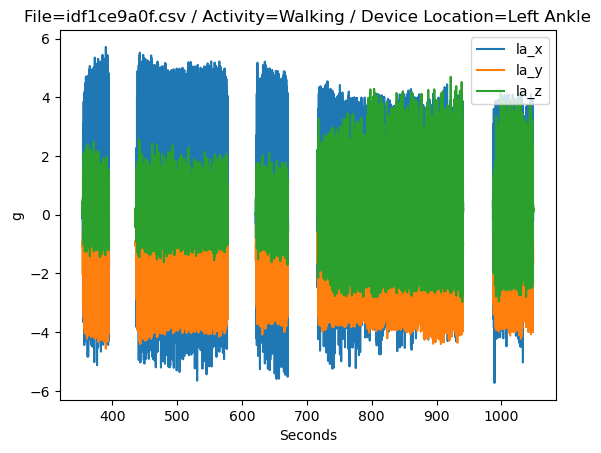

In [3]:
'''
* (2) Show plotting function imported from *utils.py*
'''
location_id = 'la'
activity = 1         # plot Activity=1 (Walking)

utils.plot_zoomin(file_id, df, activity, location_id)

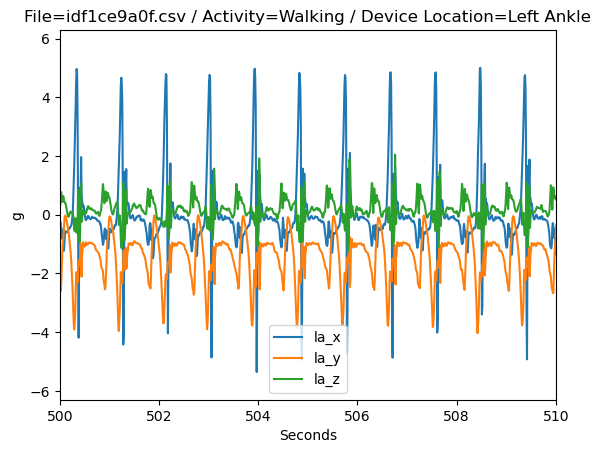

In [151]:
location_id = 'la'
activity = 1         # plot Activity=1 (Walking)
t0 = 500               # Begin second of the zoom-in plot
t1 = 510            # End second of the zoom-in plot

utils.plot_zoomin(file_id, df, activity, location_id, t0, t1)

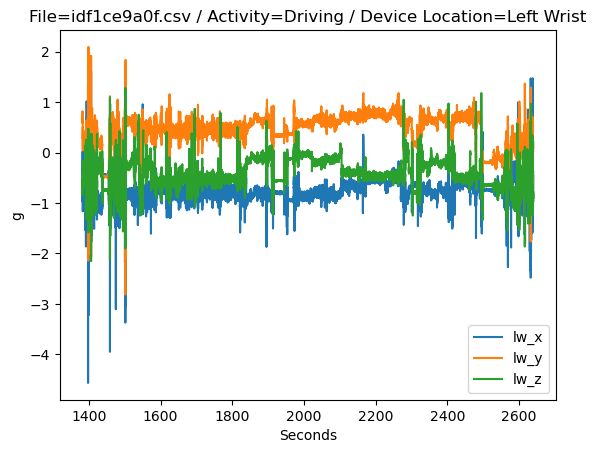

In [152]:
location_id = 'lw'
activity = 4         # plot Activity=4
t0 = 1600               # Begin second of the zoom-in plot
t1 = 1610            # End second of the zoom-in plot

utils.plot_zoomin(file_id, df, activity, location_id)

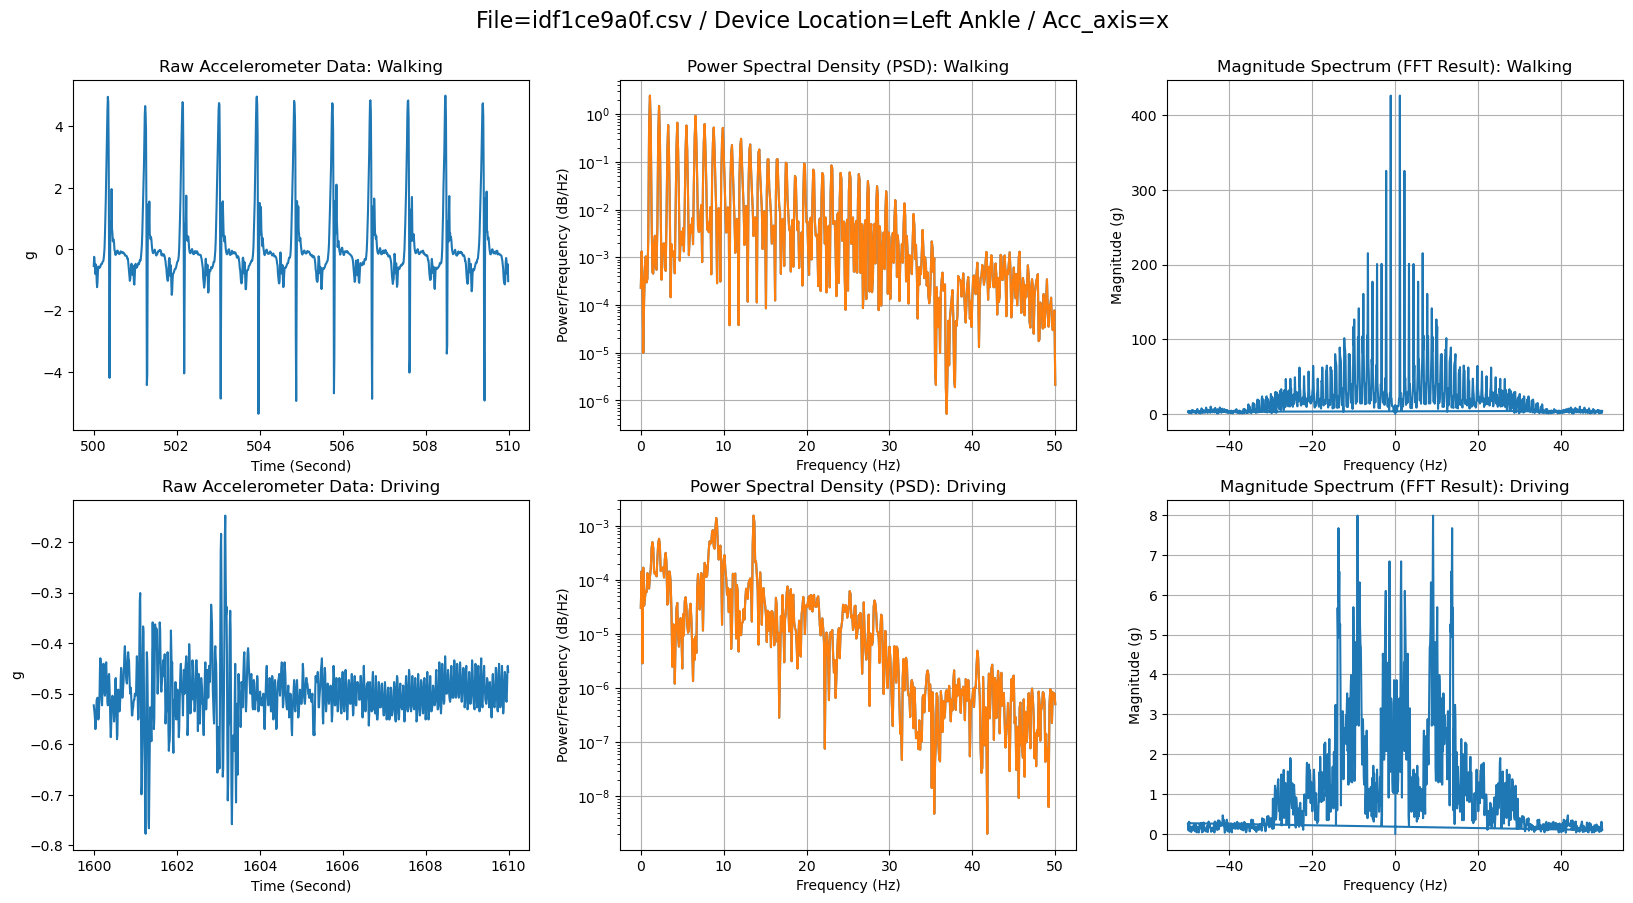

In [6]:
'''
* (3) Show exmaples of spectral analysis with **Walking** and **Driving** tasks in both *time* and *frequency* domains. 
    - Walking vs Driving
    - Time, PSD, and FFT
'''
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.signal import detrend, butter, lfilter, freqz, filtfilt

def compute_psd(signal_data, fs=fs):    
    # Compute power spectral density using Welch's method
    signal_data = detrend(signal_data)  # Detrend to preven Spectral leakage 
    nperseg = 1024   # Set default as 1024; will use a smaller value if the input signal has fewer points 
    frequencies, psd = signal.welch(signal_data, fs, nperseg=min(nperseg, len(signal_data)))
    return frequencies, psd

def compute_fft(signal_data, fs=fs):
    # Compute FFT
    signal_data = detrend(signal_data) # Detrend to preven Spectral leakage
    fft_result = fft(signal_data)
    freq = fftfreq(len(signal_data), 1/fs)
    return freq, fft_result

def cut_data(df, location_id, activity, t0, t1):
    # Prepare 10-sec Walking data from Left ankle
    df2 = df[df.activity==activity]                      # Select Activity
    df2_cut = df2[(df2.time_s>=t0) & (df2.time_s<t1)]    # Cut to a segment
    loc_x = location_id+'_x'
    loc_y = location_id+'_y'
    loc_z = location_id+'_z'
    signal_data_t = df2_cut.time_s
    signal_data_x = df2_cut[loc_x]
    signal_data_y = df2_cut[loc_y]
    signal_data_z = df2_cut[loc_z]
    return signal_data_t, signal_data_x, signal_data_y, signal_data_z

# Begin to plot
fig = plt.figure(figsize=(20, 10))

location_id = 'la'  # left Ankle
acc_component = 'x'
device_location = utils.get_device_location(location_id)

title = file_id.split('/')[-1] 
fig.suptitle('File='+title+' / Device Location='+device_location+' / Acc_axis='+acc_component, fontsize=16, y=0.95)

# Data for Walking
activity = 1            # 1: Walking
activity_type = utils.get_activity_type(activity)
t0 = 500
t1 = 510

signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, location_id, activity, t0, t1)
if acc_component=='x':
    signal_data = signal_data_x
elif acc_component=='y':
    signal_data = signal_data_y
elif acc_component=='z':
    signal_data = signal_data_z
    
plt.subplot(2,3,1)
plt.plot(signal_data_t, signal_data)
plt.title('Raw Accelerometer Data: '+activity_type)
plt.xlabel('Time (Second)')
plt.ylabel('g')

plt.subplot(2,3,2)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.subplot(2,3,3)
# Apply FFT
freq, fft_result = compute_fft(signal_data.values, fs=fs)
plt.plot(freq, np.abs(fft_result))
plt.title('Magnitude Spectrum (FFT Result): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (g)')
plt.grid(True)


# Data for Driving
activity = 4            # 4: Driving
activity_type = utils.get_activity_type(activity)
t0 = 1600
t1 = 1610
signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, location_id, activity, t0, t1)
if acc_component=='x':
    signal_data = signal_data_x
elif acc_component=='y':
    signal_data = signal_data_y
elif acc_component=='z':
    signal_data = signal_data_z
    
plt.subplot(2,3,4)
plt.plot(signal_data_t, signal_data)
plt.title('Raw Accelerometer Data: '+activity_type)
plt.xlabel('Time (Second)')
plt.ylabel('g')

plt.subplot(2,3,5)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.subplot(2,3,6)
# Apply FFT
freq, fft_result = compute_fft(signal_data_x.values, fs=fs)
plt.plot(freq, np.abs(fft_result))
plt.title('Magnitude Spectrum (FFT Result): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (g)')
plt.grid(True)

Text(0.5, 1.0, 'Filter Example: 30 Hz High-Pass')

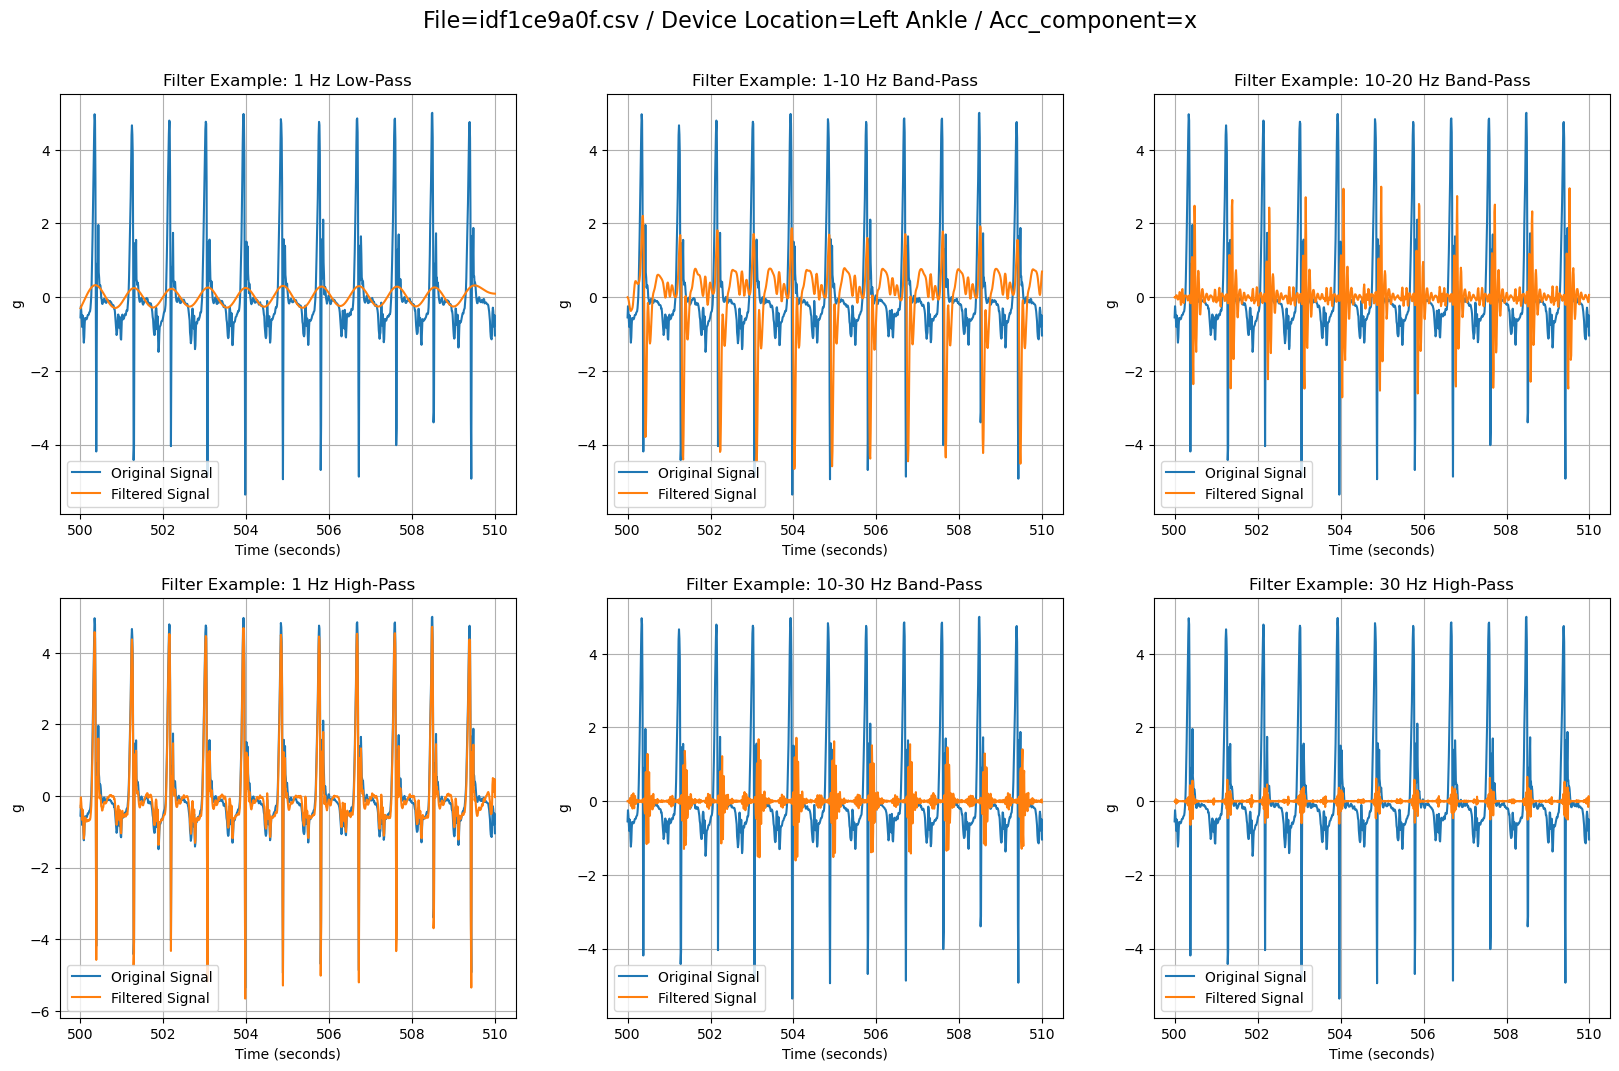

In [7]:
'''
* (4) Show exmaple results of band-pass, high-pass, and low-pass filtering on **Walking** data
'''

# Function to design a bandpass filter
def butter_bandpass_filter(signal, lowcut, highcut, fs, order=4):
    # Design a Butterworth band-pass filter
    def butter_bandpass(lowcut, highcut, fs, order=4):
        nyquist = 0.5 * fs
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        return b, a
    signal = detrend(signal)    
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

def butter_highpass_lowpass_filter(signal, filter_type, cutoff_frequency, sampling_rate, order=4):
    # Design a Butterworth high-pass or low-pass filter
    # filter_type = 'high'  # for high-pass filter
    # filter_type = 'low'   # for low-pass filter
    signal = detrend(signal)
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    filtered_signal = filtfilt(b, a, signal)  # Apply the high-pass/low-pass filter to the signal
    return filtered_signal

location_id = 'la'  # left Ankle
activity = 1            # 1: Walking
t0 = 500
t1 = 510
signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, location_id, activity, t0, t1)

t = signal_data_t
acc_component = 'x'
if acc_component=='x':
    signal = signal_data_x
if acc_component=='y':
    signal = signal_data_y
if acc_component=='z':
    signal = signal_data_z    
order  = 4     # Filter order 

# Begin to plot
fig = plt.figure(figsize=(20, 12))
device_location = utils.get_device_location(location_id)
title = file_id.split('/')[-1] 
fig.suptitle('File='+title+' / Device Location='+device_location+' / Acc_component='+acc_component, fontsize=16, y=0.95)

def plot_filtered(t, signal, filtered_signal):
    plt.plot(t, signal, label='Original Signal')
    plt.plot(t, filtered_signal, label='Filtered Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('g')
    plt.legend()
    plt.grid(True)

# Apply low-pass filter: 1 Hz
plt.subplot(2,3,1)
cutoff = 1     # Cutoff frequency for low-pass
filtered_signal = butter_highpass_lowpass_filter(signal, 'low', cutoff, fs, order=order)
plot_filtered(t, signal, filtered_signal)
plt.title('Filter Example: 1 Hz Low-Pass')

# Apply bandpass filter: 1 - 10
plt.subplot(2,3,2)
lowcut  = 1      # Lower cutoff frequency
highcut = 10     # Upper cutoff frequency
filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)
plot_filtered(t, signal, filtered_signal)
plt.title('Filter Example: 1-10 Hz Band-Pass')

# Apply bandpass filter: 
plt.subplot(2,3,3)
lowcut  = 10     # Lower cutoff frequency
highcut = 20     # Upper cutoff frequency
filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)
plot_filtered(t, signal, filtered_signal)
plt.title('Filter Example: 10-20 Hz Band-Pass')

# Apply high-pass filter: 1 Hz
plt.subplot(2,3,4)
cutoff = 1     # Cutoff frequency for high-pass
filtered_signal = butter_highpass_lowpass_filter(signal, 'high', cutoff, fs, order=order)
plot_filtered(t, signal, filtered_signal)
plt.title('Filter Example: 1 Hz High-Pass')

# Apply bandpass filter: 10 - 20
plt.subplot(2,3,5)
lowcut  = 20     # Lower cutoff frequency
highcut = 30     # Upper cutoff frequency
filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)
plot_filtered(t, signal, filtered_signal)
plt.title('Filter Example: 10-30 Hz Band-Pass')

# Apply highpass filter: 30
plt.subplot(2,3,6)
cutoff = 30     # Cutoff frequency for high-pass
filtered_signal = butter_highpass_lowpass_filter(signal, 'high', cutoff, fs, order=order)
plot_filtered(t, signal, filtered_signal)
plt.title('Filter Example: 30 Hz High-Pass')

(0.0, 15.0)

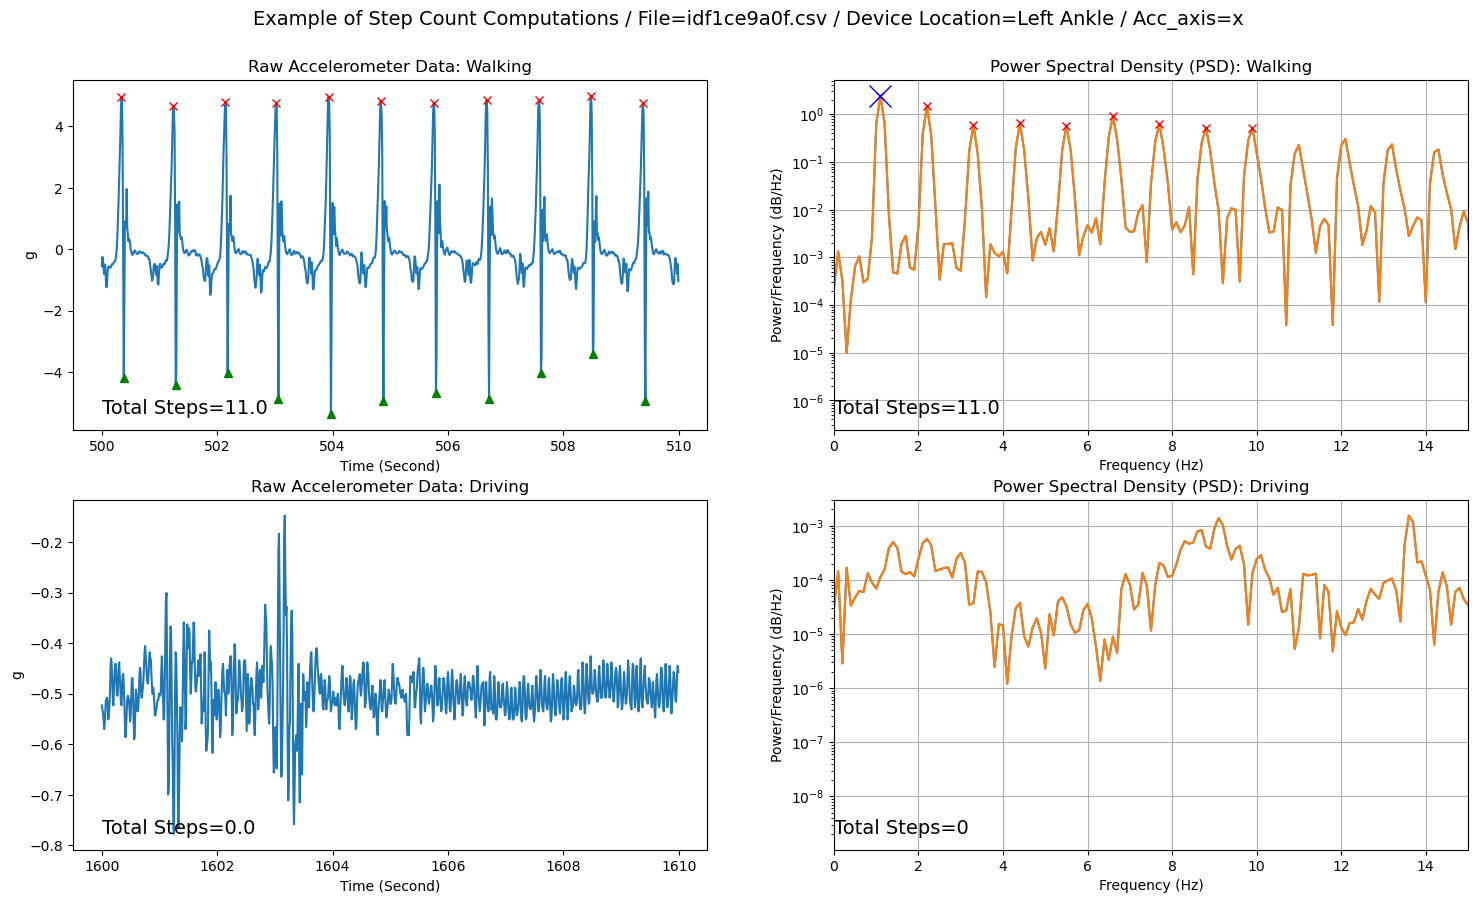

In [10]:
'''
(5) Measure walking and step count features in both time and frequency domains
'''
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.signal import detrend, butter, lfilter, freqz, filtfilt

# Begin to plot
fig = plt.figure(figsize=(18, 10))

location_id = 'la'  # left Ankle
acc_component = 'x'
device_location = utils.get_device_location(location_id)

title = file_id.split('/')[-1] 
fig.suptitle('Example of Step Count Computations / File='+title+' / Device Location='+device_location+' / Acc_axis='+acc_component, fontsize=14, y=0.95)

# Data for Walking
activity = 1            # 1: Walking
activity_type = utils.get_activity_type(activity)
t0 = 500
t1 = 510

signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, location_id, activity, t0, t1)
if acc_component=='x':
    signal_data = signal_data_x
elif acc_component=='y':
    signal_data = signal_data_y
elif acc_component=='z':
    signal_data = signal_data_z
    
plt.subplot(2,2,1)
plt.plot(signal_data_t, signal_data)
plt.title('Raw Accelerometer Data: '+activity_type)
plt.xlabel('Time (Second)')
plt.ylabel('g')

x = signal_data_t.values
y = signal_data.values
peaks, _ = find_peaks(y, prominence=5)
troughs, _ = find_peaks(-y, prominence=5)
plt.plot(x[peaks], y[peaks], 'rx', label='Peaks')
plt.plot(x[troughs], y[troughs], 'g^', label='Troughs')
total_steps = (len(peaks)+len(troughs))/2
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.subplot(2,2,2)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)

x = frequencies
y = psd
peaks, _ = find_peaks(y, prominence=0.5)
plt.semilogy(x[peaks], y[peaks], 'rx', label='Peaks')
# Compute total steps based on the corresponding frequency of the maximum peak on the PSD plot
if len(peaks)>0:
    index = y==max(y[peaks])
    max_peak_freq = x[index][0]
    data_length_in_sec = (len(signal_data_t)/fs)
    total_steps = max_peak_freq * data_length_in_sec
    plt.semilogy(x[index], y[index], 'bx', markersize=16, label='Max_Peak')  # Plot the maximum peak that used for computing total_step
elif len(peaks)==0:
    total_steps = 0
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.title('Power Spectral Density (PSD): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.xlim(0, 15)

##################################################################
# Data for Driving
activity = 4            # 4: Driving
activity_type = utils.get_activity_type(activity)
t0 = 1600
t1 = 1610
signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, location_id, activity, t0, t1)
if acc_component=='x':
    signal_data = signal_data_x
elif acc_component=='y':
    signal_data = signal_data_y
elif acc_component=='z':
    signal_data = signal_data_z
    
plt.subplot(2,2,3)
plt.plot(signal_data_t, signal_data)
plt.title('Raw Accelerometer Data: '+activity_type)
plt.xlabel('Time (Second)')
plt.ylabel('g')

x = signal_data_t.values
y = signal_data.values
peaks, _ = find_peaks(y, prominence=5)
troughs, _ = find_peaks(-y, prominence=5)
plt.plot(x[peaks], y[peaks], 'rx', label='Peaks')
plt.plot(x[troughs], y[troughs], 'g^', label='Troughs')
total_steps = (len(peaks)+len(troughs))/2
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.subplot(2,2,4)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)

x = frequencies
y = psd
peaks, _ = find_peaks(y, prominence=0.5)
plt.semilogy(x[peaks], y[peaks], 'rx', label='Peaks')
# Compute total steps based on the corresponding frequency of the maximum peak on the PSD plot
if len(peaks)>0:
    index = y==max(y[peaks])
    max_peak_freq = x[index][0]
    data_length_in_sec = (len(signal_data_t)/fs)
    total_steps = max_peak_freq * data_length_in_sec
    plt.semilogy(x[index], y[index], 'bx', markersize=16, label='Max_Peak')  # Plot the maximum peak that used for computing total_step
elif len(peaks)==0:
    total_steps = 0
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.title('Power Spectral Density (PSD): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.xlim(0, 15)

(0.0, 15.0)

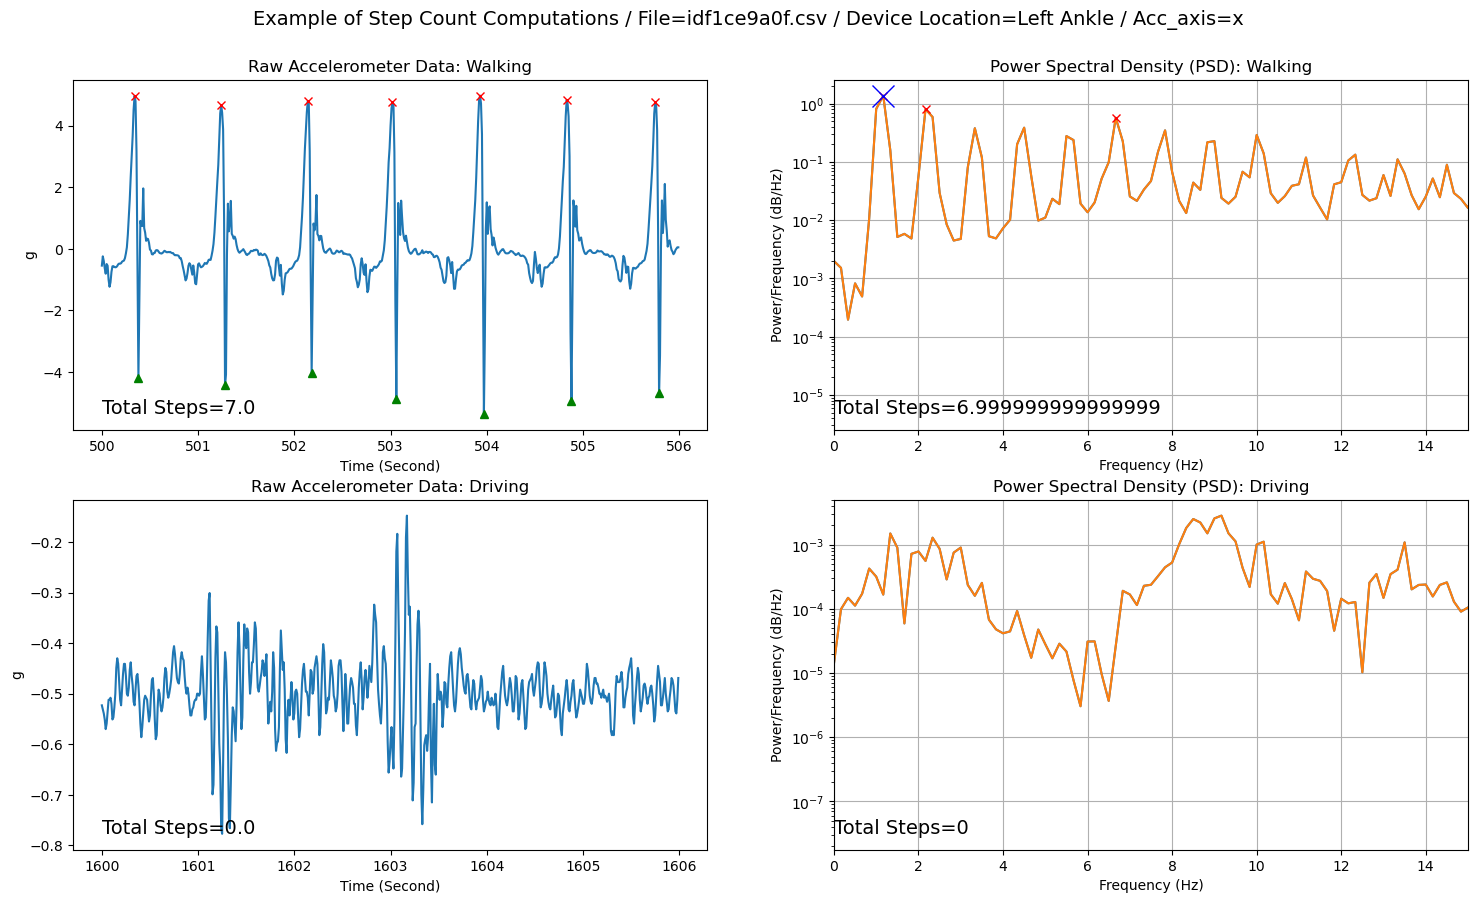

In [12]:
'''
(5) Measure walking and step count features in both time and frequency domains
'''
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.signal import detrend, butter, lfilter, freqz, filtfilt

# Begin to plot
fig = plt.figure(figsize=(18, 10))

location_id = 'la'  # left Ankle
acc_component = 'x'
device_location = utils.get_device_location(location_id)

title = file_id.split('/')[-1] 
fig.suptitle('Example of Step Count Computations / File='+title+' / Device Location='+device_location+' / Acc_axis='+acc_component, fontsize=14, y=0.95)

# Data for Walking
activity = 1            # 1: Walking
activity_type = utils.get_activity_type(activity)
t0 = 500
t1 = 506

signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, location_id, activity, t0, t1)
if acc_component=='x':
    signal_data = signal_data_x
elif acc_component=='y':
    signal_data = signal_data_y
elif acc_component=='z':
    signal_data = signal_data_z
    
plt.subplot(2,2,1)
plt.plot(signal_data_t, signal_data)
plt.title('Raw Accelerometer Data: '+activity_type)
plt.xlabel('Time (Second)')
plt.ylabel('g')

x = signal_data_t.values
y = signal_data.values
peaks, _ = find_peaks(y, prominence=5)
troughs, _ = find_peaks(-y, prominence=5)
plt.plot(x[peaks], y[peaks], 'rx', label='Peaks')
plt.plot(x[troughs], y[troughs], 'g^', label='Troughs')
total_steps = (len(peaks)+len(troughs))/2
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.subplot(2,2,2)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)

x = frequencies
y = psd
peaks, _ = find_peaks(y, prominence=0.5)
plt.semilogy(x[peaks], y[peaks], 'rx', label='Peaks')
# Compute total steps based on the corresponding frequency of the maximum peak on the PSD plot
if len(peaks)>0:
    index = y==max(y[peaks])
    max_peak_freq = x[index][0]
    data_length_in_sec = (len(signal_data_t)/fs)
    total_steps = max_peak_freq * data_length_in_sec
    plt.semilogy(x[index], y[index], 'bx', markersize=16, label='Max_Peak')  # Plot the maximum peak that used for computing total_step
elif len(peaks)==0:
    total_steps = 0
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.title('Power Spectral Density (PSD): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.xlim(0, 15)

##################################################################
# Data for Driving
activity = 4            # 4: Driving
activity_type = utils.get_activity_type(activity)
t0 = 1600
t1 = 1606
signal_data_t, signal_data_x, signal_data_y, signal_data_z = cut_data(df, location_id, activity, t0, t1)
if acc_component=='x':
    signal_data = signal_data_x
elif acc_component=='y':
    signal_data = signal_data_y
elif acc_component=='z':
    signal_data = signal_data_z
    
plt.subplot(2,2,3)
plt.plot(signal_data_t, signal_data)
plt.title('Raw Accelerometer Data: '+activity_type)
plt.xlabel('Time (Second)')
plt.ylabel('g')

x = signal_data_t.values
y = signal_data.values
peaks, _ = find_peaks(y, prominence=5)
troughs, _ = find_peaks(-y, prominence=5)
plt.plot(x[peaks], y[peaks], 'rx', label='Peaks')
plt.plot(x[troughs], y[troughs], 'g^', label='Troughs')
total_steps = (len(peaks)+len(troughs))/2
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.subplot(2,2,4)
# Apply PSD with Scipy
frequencies, psd = compute_psd(signal_data, fs=fs)
plt.plot(frequencies, psd)
plt.semilogy(frequencies, psd)

x = frequencies
y = psd
peaks, _ = find_peaks(y, prominence=0.5)
plt.semilogy(x[peaks], y[peaks], 'rx', label='Peaks')
# Compute total steps based on the corresponding frequency of the maximum peak on the PSD plot
if len(peaks)>0:
    index = y==max(y[peaks])
    max_peak_freq = x[index][0]
    data_length_in_sec = (len(signal_data_t)/fs)
    total_steps = max_peak_freq * data_length_in_sec
    plt.semilogy(x[index], y[index], 'bx', markersize=16, label='Max_Peak')  # Plot the maximum peak that used for computing total_step
elif len(peaks)==0:
    total_steps = 0
plt.text(x[0], min(y), 'Total Steps='+str(total_steps), fontsize=14)

plt.title('Power Spectral Density (PSD): '+activity_type)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.xlim(0, 15)